<a href="https://colab.research.google.com/github/Shritej24c/NLP101/blob/main/HW/HW2/ShritejShrikant_file1_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'><b><font color='indianred'></p>Spam Detection HW</b></h1>

<font color = 'indianred' size = 4 >**Read complete instructions before starting the HW** </font>


# <font color='indianred'> **Q1: Load the dataset  (1 Point)**

- For this Hw you will usespam dataset from kaggle which can be found from [this](https://www.kaggle.com/uciml/sms-spam-collection-dataset) link. You can download this data and either upload it in google drive or in colab workspace. Load the data in pandas dataframe.

- There are only two useful columns. These columns are related to (1) label (ham and spam) and the (2) text of email.

- Rename columns as label and message

- Find the %  ham amd spam in the data.





# <font color='indianred'> **Q2 : Provide the metric for evaluating model (1 Point)**</font>

As you will notice, the  data is highly imbalanced (most messages are labelled as ham and only few are labelled as spam). Always predicting ham will give us very good accuracy (close to 90%). So you need to choose a different metric.

Task: Provde the metric you will choose to evaluate your model. Explain why this is an appropriate metric for this case.

# <font color='indianred'> **Q3 : Classification Pipelines (18 Points)**</font>

In the previous lectures you learned Data processing, Featurization such as CountVectorizer, TFIDFVectorizer, and also Feature Engineering.
* You will now use folllowing methods to create fearures which you can use in your model.

    1. Sparse Embeddings (TF-IDF) (6 Points)
    2. Feature Engineering (see examples below) (6 Points)
    3. Sparse Embeddings (TF-IDF) + Feature Engineering (6 Points)

**Approach:**

<font color='indianred'> ****Use a smaller subset of dataset (e.g. 5-10 %) to evaluate the three pipelines . Based on your analysis (e.g. model score, learning curves) , choose one pipeline from the three. Provde your rational for choosing the pipleine. Train only the final pipeline on randomly selected larger subset (e.g. 40%) of the data.** </font>

**Requirements:**

1. You can use any ML model (Logistic Regression, XgBoost) for the classification. You will need to tune the **model for imbalanced dataset** (The link on XGBoost tutorial for imbalanced data: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/).

2. For feature engineering, you can choose from the examples below. You do not  have to use all of them. You can add other featues as well. Think about what faetures can distinguish a spam from a regular email. Some examples :

>> Count of following  (Words, characters, digits, exclamation marks, numbers, Nouns, ProperNouns, AUX, VERBS, Adjectives, named entities, spelling mistakes (see the link on how to get spelling mistakes https://pypi.org/project/pyspellchecker/).

3. For Sparse embeddings you will use **tfidf vectorization**. You need to choose appopriate parameters e.g. min_df, max_df, max_faetures, n-grams etc.).

4. Think carefully about the pre-processing you will do.

Tip: <font color = 'indianred'>**Using GridSearch for hyperparameter tuning might take a lot of time. Try using RandomizedSearch.**</font> You can also explore faster implementation of Gridsearch and RandomizedSearch in sklearn:

1. [Halving Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html?highlight=halving#sklearn.model_selection.HalvingGridSearchCV)

2. [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html?highlight=halving#sklearn.model_selection.HalvingRandomSearchCV)





# **Required Submissions:**
1.  Submit two colab/jupyter notebooks
- (analysis with smaller subset and all three pipelines)
- (analysis with bigger subset and only final pipeline)
2. Pdf version of the notebooks (HWs will not be graded if pdf version is not provided.
3. **The notebooks and pdf files should have the output.**
4. **Name files as follows : FirstName_file1_hw2, FirstName_file2_h2**

## <font color ='pickle'> Install Libraries

In [3]:
!pip install -U scikit-optimize -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.1 MB/s eta 0:00:00


## <font color ='pickle'> Import Libraries


In [4]:
# Import necessary libraries
import pandas as pd
from pathlib import Path

# Import the joblib library for saving and loading models
import joblib

# Import scikit-learn classes for building models
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import *
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator

from skopt.space import Real, Categorical, Integer
from sklearn.metrics import precision_recall_curve, auc, make_scorer, cohen_kappa_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

import spacy

# Import the scipy library for working with sparse matrices
from scipy.sparse import csr_matrix

In [5]:
import sys
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

    !pip install -U nltk -qq
    !pip install -U spacy -qq
    !python -m spacy download en_core_web_sm -qq

    basepath = '/content/drive/MyDrive/NLP/'
    sys.path.append('/content/drive/MyDrive/NLP/custom-functions')
else:
    basepath = '/home/harpreet/Insync/google_drive_shaannoor/data'
    sys.path.append(
        '/home/harpreet/Insync/google_drive_shaannoor/data/custom-functions')

Mounted at /content/drive
2023-09-10 09:06:30.421192: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 93.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/NLP/custom-functions']

In [7]:
base_folder = Path(basepath)
data_folder = base_folder/'datasets/spam'
model_folder = base_folder/'models/spam'
custom_functions = base_folder/'custom-functions'


In [8]:
import custom_preprocessor_mod as cp
from featurizer import ManualFeatures
from plot_learning_curve import plot_learning_curve

## Load Dataset

Downloaded the dataset from here : https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [9]:
data = pd.read_csv(data_folder/'spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
data.shape

(5572, 5)

In [11]:
data.isnull().sum()


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [12]:
data['v1'].value_counts()


ham     4825
spam     747
Name: v1, dtype: int64

In [13]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
data.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)
data.head()



,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# prompt: calculate % of values in the column label of the 'data' dataframe and print out each labels % using print function

data['label'].value_counts(normalize=True)*100


ham     86.593683
spam    13.406317
Name: label, dtype: float64

Above are % of the Labels 'ham' and 'spam corresponding to 87% and 13% respectively

In [15]:
# prompt: convert above labels: 0 for 'ham' & 1 'spam for above dataset

data['label'].replace(['ham', 'spam'], [0, 1], inplace=True)
data['label'].value_counts(normalize=True)*100

0    86.593683
1    13.406317
Name: label, dtype: float64

In [16]:
data_small = data.sample(frac=0.1, random_state=21, replace=False).reset_index(drop=True)

print(data_small.shape)

print(data_small['label'].value_counts())

x = data_small['text']
y = data_small['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21, stratify=y, shuffle=True)


print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

print(y_train.value_counts())
print(y_test.value_counts())



(557, 2)
0    486
1     71
Name: label, dtype: int64
(445,) (112,) (445,) (112,)
0    388
1     57
Name: label, dtype: int64
0    98
1    14
Name: label, dtype: int64


In [17]:
xtrain = x_train.values
ytrain = y_train.values

xtest = x_test.values
ytest = y_test.values


print(xtrain.shape, ytrain.shape)




(445,) (445,)


In [18]:
xtrain[222]

'England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+'

In [32]:
cp.SpacyPreprocessor??

In [33]:
# Spacy Tokenizer
# Loading the 'en_core_web_sm' language model from the spaCy library
nlp = spacy.load('en_core_web_sm')


disabled = nlp.select_pipes(
    disable=['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner'])


def spacy_tokenizer(data):
    doc = nlp(data)
    return [token.text for token in doc]





In [53]:
cpp = cp.SpacyPreprocessor(
    model='en_core_web_sm')



def spacy_preprocessor(text):
    filtered_text = cpp.transform([text])
    return " ".join(filtered_text)

In [54]:
# save this to a file
X_train_cleaned = cpp.transform(xtrain)
file_X_train_cleaned_sparse_embed = data_folder / \
    'x_train_cleaned_sparse_embed.pkl'
joblib.dump(X_train_cleaned, file_X_train_cleaned_sparse_embed)


/content/drive/MyDrive/NLP/custom-functions/custom_preprocessor_mod.py:90: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


['/content/drive/MyDrive/NLP/datasets/spam/x_train_cleaned_sparse_embed.pkl']

In [55]:
X_test_cleaned = cpp.transform(xtest)
# save  this to a file
file_X_test_cleaned_sparse_embed = data_folder / 'x_test_cleaned_sparse_embed.pkl'
joblib.dump(X_test_cleaned, file_X_test_cleaned_sparse_embed)

['/content/drive/MyDrive/NLP/datasets/spam/x_test_cleaned_sparse_embed.pkl']

## <font color ='pickle'> Defining Class Weights for Imbalanced data to train Classifier

In [56]:
w = {}

w[1] = int(y_train.value_counts()[0]/ytrain.shape[0]*100)

w[0] = 100 - w[1]


In [57]:
w

{1: 87, 0: 13}

## <font color ='pickle'> Metric Selection

>




From the above code, we can see that this is a imbalanced dataset with 87-13 percentage split between the majority and minority class. Hence, resorting to standard metric wouldn't help in this case.



> Standard metrics work well on most problems, which is why they are widely adopted. But all metrics make assumptions about the problem or about what is important in the problem. Therefore an evaluation metric must be chosen that best captures what you or your project stakeholders believe is important about the model or predictions, which makes choosing model evaluation metrics challenging.


Hence, we'll evaluate our models using various metric depending on the classification that we use for our problem statement.


Here are some of the blogs that I referred to:

1. [ML Mastery](https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/)

2. [stat exchange](https://stats.stackexchange.com/questions/222558/classification-evaluation-metrics-for-highly-imbalanced-data)

3. [Towards Data Science](https://towardsdatascience.com/identifying-the-right-classification-metric-for-your-task-21727fa218a2)


After doing a bit of research on the best metric to use for Imbalanced Dataset, I narrowed down my list to the following metrics:



1.   **Balanced Accuracy** - (for all classification algorithms)

2.  **F0.5** - From the below tree diagram we can see, that if we want to predict class labels rather than probabilities (eg. Ensemble Tree based classification algorithms) and the cost of False Positives >> False Negative, we can use F-0.5 score

3. **Kappa** - (observed accuracy - expected accuracy)/(1 - expected accuracy) [here](https://stats.stackexchange.com/questions/82162/cohens-kappa-in-plain-english)

4. **Precision Recall AUC** - For probability based classification algorithms (Eg. Logistic Regression)






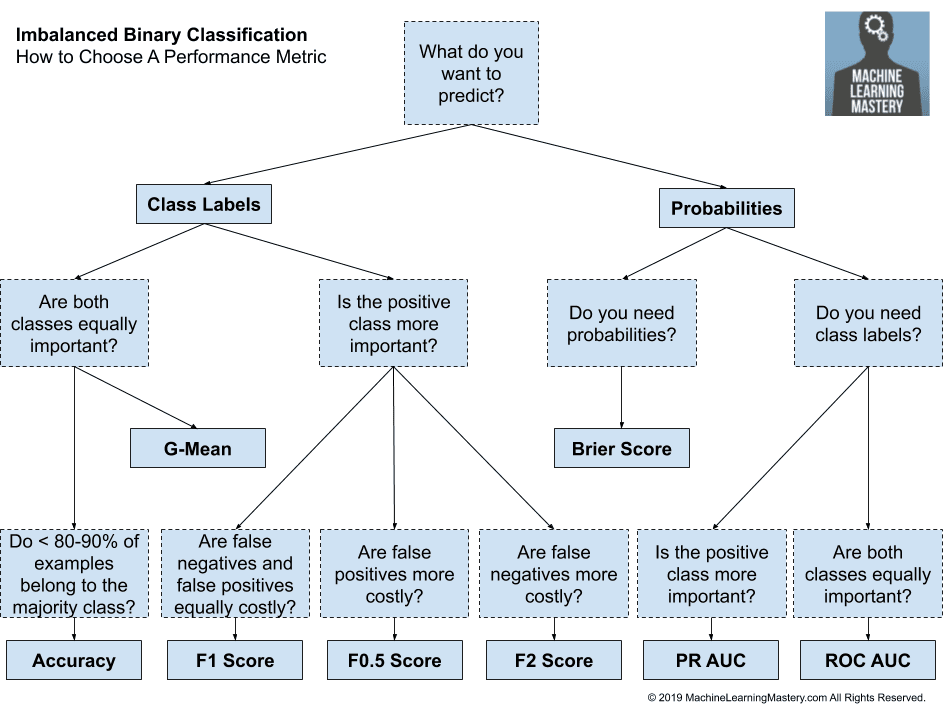

## <font color ='pickle'>**Pipeline 1: Data Preprocessing + Sparse Embeddings (TF-IDF) + ML Model**

### <font color ='pickle'>**Create Pipeline**

In [58]:
classifier_1 = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer='word', tokenizer=spacy_tokenizer
                                   #, preprocessor=spacy_preprocessor
                                   # ,token_pattern=r"[\S]+"
                                   )),
    ('classifier', LogisticRegression(max_iter=10000
                                      , class_weight= w
                                      ))])

### <font color ='pickle'>**Parameter Grid**

In [59]:
classifier_1.get_params()

{'memory': None,
 'steps': [('vectorizer',
   TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7d837345e200>)),
  ('classifier',
   LogisticRegression(class_weight={0: 13, 1: 87}, max_iter=10000))],
 'verbose': False,
 'vectorizer': TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7d837345e200>),
 'classifier': LogisticRegression(class_weight={0: 13, 1: 87}, max_iter=10000),
 'vectorizer__analyzer': 'word',
 'vectorizer__binary': False,
 'vectorizer__decode_error': 'strict',
 'vectorizer__dtype': numpy.float64,
 'vectorizer__encoding': 'utf-8',
 'vectorizer__input': 'content',
 'vectorizer__lowercase': True,
 'vectorizer__max_df': 1.0,
 'vectorizer__max_features': None,
 'vectorizer__min_df': 1,
 'vectorizer__ngram_range': (1, 1),
 'vectorizer__norm': 'l2',
 'vectorizer__preprocessor': None,
 'vectorizer__smooth_idf': True,
 'vectorizer__stop_words': None,
 'vectorizer__strip_accents': None,
 'vectorizer__sublinear_tf': False,
 'vectorizer__token_pattern': '(?u)\\b\\w\\

In [60]:
param_bayes_classifier_1 = {'vectorizer__max_features': Integer(low = 1000, high= 5000, prior= 'uniform'),
                            #'vectorizer__ngram_range' : [(1, 1), (1, 2)],
                            'vectorizer__max_df' : Real(0.1, 0.9, 'uniform'),
                            #'vectorizer__min_df' : (0.01, 0.4, 'uniform'),
                           'classifier__C': Real(low=10 , high=1000)
                           }


### <font color ='pickle'>**Specify BayesSearch**

In [61]:
??BayesSearchCV


### <font color ='pickle'> Customized Scoring Metric

Since Logistic Regression is used, according to the above metric selection, let's evaluate this model using

**PR AUC metric**

In [62]:

# Define a custom scoring function for PR AUC
def custom_pr_auc_scorer(y, y_proba):
    #y_proba = estimator.predict_proba(X)[:, 1]  # Probability of positive class
    precision, recall, _ = precision_recall_curve(y, y_proba)
    pr_auc = auc(recall, precision)
    return pr_auc


# Define a custom scoring function for Cohen's Kappa
def custom_kappa_scorer(y, y_pred):
    kappa = cohen_kappa_score(y, y_pred)
    return kappa


# Use cross-validation with the custom scoring function
pr_auc_scorer = make_scorer(custom_pr_auc_scorer, greater_is_better=True)  # Set greater_is_better=True for higher PR AUC scores


# Use cross-validation with the custom scoring function
kappa_scorer = make_scorer(custom_kappa_scorer)


#### Final Metric for evaluation

Since I'm using probability based classifier (logistic regression), Precision Recall AUC metric would be the most appropriate to compare evaluate different hyper-parameter.

### <font color ='pickle'> Perform Bayesian Optimization

In [63]:
# Perform Bayesian optimization
optimizer = BayesSearchCV(estimator=classifier_1, search_spaces= param_bayes_classifier_1, n_iter=50, cv=5, n_jobs = -1, verbose = 1
                          , scoring=pr_auc_scorer
                          )

X_train_cleaned_sparse_embed = joblib.load(file_X_train_cleaned_sparse_embed)

# Fit the model to the data
optimizer.fit(X_train_cleaned_sparse_embed, ytrain)

# Print the best hyperparameters aand corresponding score
print("Best score:", optimizer.best_score_)
print("Best hyperparameters:", optimizer.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### <font color ='pickle'>**Save Model**

In [64]:
file_best_estimator_pipeline1_round1 = model_folder / \
    'logistic_pipeline1_prauc.pkl'
file_complete_grid_pipeline1_round1 = model_folder / \
    'logistic_pipeline1_prauc_complete_grid.pkl'

joblib.dump(optimizer.best_estimator_,
            file_best_estimator_pipeline1_round1)
joblib.dump(optimizer, file_complete_grid_pipeline1_round1)


['/content/drive/MyDrive/NLP/models/spam/logistic_pipeline1_prauc_complete_grid.pkl']

In [65]:
# load the saved model
best_estimator_pipeline1_round1 = joblib.load(
    file_best_estimator_pipeline1_round1)
complete_grid_pipeline1_round1 = joblib.load(
    file_complete_grid_pipeline1_round1)

### <font color ='pickle'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

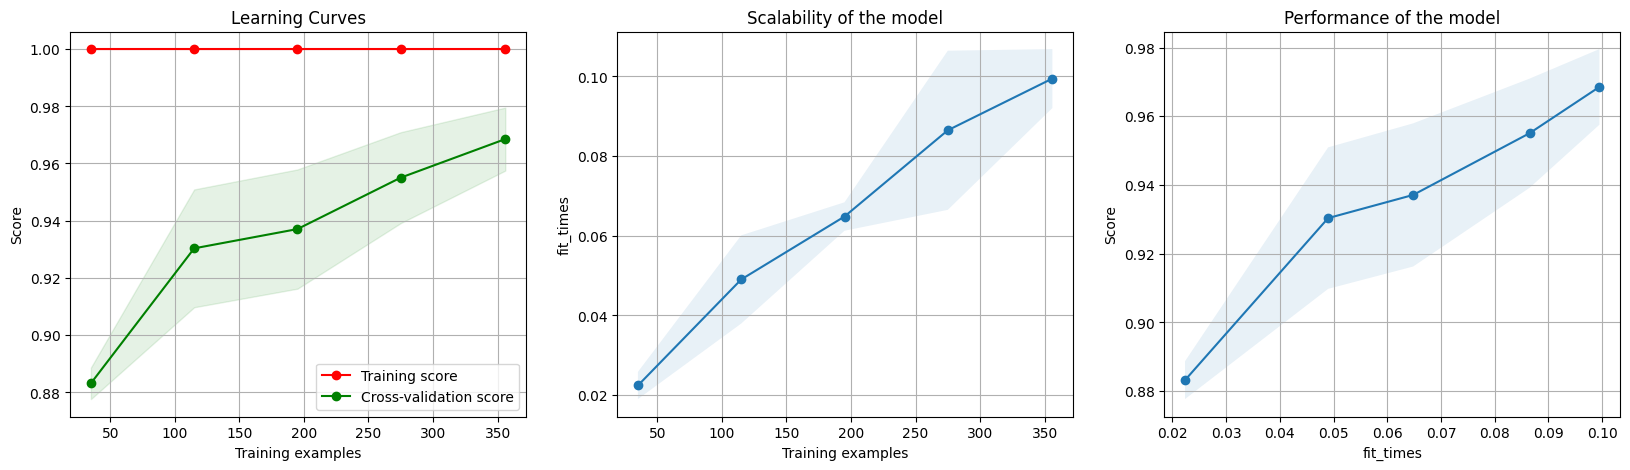

In [66]:
# plot learning curces
plot_learning_curve(best_estimator_pipeline1_round1, 'Learning Curves',
                    X_train_cleaned_sparse_embed, y_train, n_jobs=-1)

<font color ='indianred'>**Observations**</font>
<br>
Clearly there is <font color ='indianred'>**overfitting**</font>. In case of overfitting we can improve results by

1. Adding more data (training model on complete dataset)
2. By hyperparameter tuning (reduce model complexity) of logistic regression and vectorizer.

In [67]:
# let's check the train scores
print(best_estimator_pipeline1_round1.score(
    X_train_cleaned_sparse_embed, y_train))

# let's check the cross validation score
print(complete_grid_pipeline1_round1.best_score_)

1.0
0.8923201517583541


### <font color ='pickle'>**Evaluate on Test Data**

In [68]:
# Final Pipeline
def final_pipeline(text):
    cleaned_text = cp.SpacyPreprocessor(model='en_core_web_sm').transform(text)
    # cleaned_text = joblib.load(file_X_test_cleaned_sparse_embed)
    best_estimator_pipeline1_round1 = joblib.load(
        file_best_estimator_pipeline1_round1)
    predictions = best_estimator_pipeline1_round1.predict(cleaned_text)
    return predictions

In [69]:
# predicted values for Test data set
y_test_pred = final_pipeline(xtest)


/content/drive/MyDrive/NLP/custom-functions/custom_preprocessor_mod.py:90: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [70]:
print('\nTest set classification report:\n\n',
      classification_report(y_test, y_test_pred))


Test set classification report:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98        98
           1       1.00      0.71      0.83        14

    accuracy                           0.96       112
   macro avg       0.98      0.86      0.91       112
weighted avg       0.97      0.96      0.96       112



In [71]:
# prompt: print confusion matrix sklearn with labels in pandas df

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[98  0]
 [ 4 10]]


In [72]:
4/14

0.2857142857142857

In [73]:
y_test

345    0
141    0
365    0
381    0
121    0
      ..
483    0
358    1
34     0
236    0
30     1
Name: label, Length: 112, dtype: int64

## <font color ='pickle'>**Pipeline 2: Data Preprocessing + Manual Features + ML Model pipeline**

In this case we will extract following features and use these as the input to our logistic regression.
  1. number of words
  2. number of characters
  3. number of characters without space
  4. average word length
  5. number of digits
  6. number of numbers
  7. number of nouns or propernouns
  8. number of aux
  9. number of verbs
  10. number of adjectives
  11. number of ner (entiites)

### <font color ='pickle'>**Generate Manual Features**

In [74]:
??ManualFeatures


In [76]:
featurizer = ManualFeatures(spacy_model='en_core_web_sm')

In [77]:
X_train_features, feature_names = featurizer.fit_transform(xtrain)

/content/drive/MyDrive/NLP/custom-functions/custom_preprocessor_mod.py:90: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [78]:
print(X_train_features.shape)
X_train_features[0:3]


(445, 11)


array([[  5.        ,  24.        ,  20.        ,   3.33333333,
          0.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   1.        ,   1.        ],
       [ 28.        , 119.        ,  92.        ,   3.17241379,
         19.        ,   4.        ,   5.        ,  10.        ,
          0.        ,   4.        ,   3.        ],
       [ 19.        , 112.        ,  94.        ,   4.7       ,
          4.        ,   4.        ,   4.        ,   9.        ,
          0.        ,   2.        ,   3.        ]])

In [79]:
feature_names

['count_words',
 'count_characters',
 'count_characters_no_space',
 'avg_word_length',
 'count_digits',
 'count_numbers',
 'noun_count',
 'aux_count',
 'verb_count',
 'adj_count',
 'ner']

### <font color ='pickle'>**Create Pipeline**

In [80]:
classifier_2 = Pipeline([
    ('classifier', LogisticRegression(max_iter=10000
                                    , class_weight = w)),
])


In [83]:
classifier_2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'classifier', 'classifier__C', 'classifier__class_weight', 'classifier__dual', 'classifier__fit_intercept', 'classifier__intercept_scaling', 'classifier__l1_ratio', 'classifier__max_iter', 'classifier__multi_class', 'classifier__n_jobs', 'classifier__penalty', 'classifier__random_state', 'classifier__solver', 'classifier__tol', 'classifier__verbose', 'classifier__warm_start'])

### <font color ='pickle'>**Parameter Grid**

In [84]:
param_bayes_classifier_2 = {
    'classifier__C': Real(0.0001, 10000, prior='log-uniform'),
    'classifier__solver': Categorical(['liblinear', 'saga', 'newton-cg', 'lbfgs'])
}



### <font color ='pickle'>**Specify Bayes Search**

In [86]:
# Perform Bayesian optimization
optimizer2 = BayesSearchCV(estimator=classifier_2, search_spaces= param_bayes_classifier_2, n_iter=20, cv=5, n_jobs = -1, verbose = 1
                          , scoring=pr_auc_scorer
                          )


# Fit the model to the data
optimizer2.fit(X_train_features, ytrain)

# Print the best hyperparameters aand corresponding score
print("Best score:", optimizer2.best_score_)
print("Best hyperparameters:", optimizer2.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best score: 0.9142987349728923
Best hyperparameters: OrderedDict([('classifier__C', 0.0003979477229406517), ('classifier__solver', 'liblinear')])


In [87]:

print(f'Best cross-validation score: {optimizer2.best_score_:.2f}')
print("\nBest parameters: ", optimizer2.best_params_)
print("\nBest estimator: ", optimizer2.best_estimator_)

Best cross-validation score: 0.91

Best parameters:  OrderedDict([('classifier__C', 0.0003979477229406517), ('classifier__solver', 'liblinear')])

Best estimator:  Pipeline(steps=[('classifier',
                 LogisticRegression(C=0.0003979477229406517,
                                    class_weight={0: 13, 1: 87}, max_iter=10000,
                                    solver='liblinear'))])


### <font color ='pickle'>**Save Model**

In [88]:
file_best_estimator_pipeline2_round1 = model_folder / \
    'logistic_pipeline2_prauc_best_estimator.pkl'
file_complete_grid_pipeline2_round1 = model_folder / \
    'logistic_pipeline2_prauc_complete_grid.pkl'


In [90]:
joblib.dump(optimizer2.best_estimator_,
            file_best_estimator_pipeline2_round1)
joblib.dump(optimizer2, file_complete_grid_pipeline2_round1)

['/content/drive/MyDrive/NLP/models/spam/logistic_pipeline2_prauc_complete_grid.pkl']

In [91]:
# load the saved model
best_estimator_pipeline2_round1 = joblib.load(
    file_best_estimator_pipeline2_round1)
complete_grid_pipeline2_round1 = joblib.load(
    file_complete_grid_pipeline2_round1)


### <font color ='pickle'>**Plot Learning**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

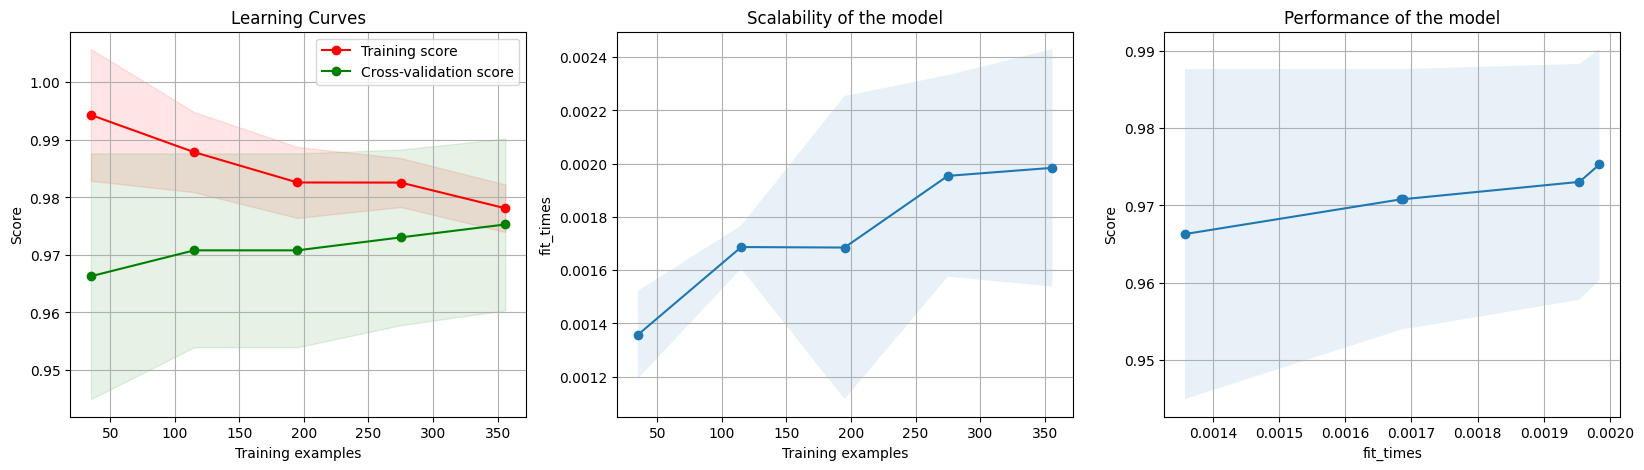

In [92]:
# plot learning curces
plot_learning_curve(best_estimator_pipeline2_round1, 'Learning Curves',
                    X_train_features, ytrain, n_jobs=-1)

In [94]:
# let's check the train scores
print(best_estimator_pipeline2_round1.score(X_train_features, ytrain))

# let's check the cross validation score
print(complete_grid_pipeline2_round1.best_score_)

0.9797752808988764
0.9142987349728923


In [95]:
# Final Pipeline
def final_pipeline(text):
    features, feature_names = featurizer.fit_transform(text)
    best_estimator_pipeline2_round1 = joblib.load(
        file_best_estimator_pipeline2_round1)
    predictions = best_estimator_pipeline2_round1.predict(features)
    return predictions


In [96]:
# predicted values for Test data set
y_test_pred = final_pipeline(xtest)


/content/drive/MyDrive/NLP/custom-functions/custom_preprocessor_mod.py:90: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [98]:
print('\nTest set classification report:\n\n',
      classification_report(ytest, y_test_pred))



Test set classification report:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98        98
           1       0.86      0.86      0.86        14

    accuracy                           0.96       112
   macro avg       0.92      0.92      0.92       112
weighted avg       0.96      0.96      0.96       112



In [99]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, y_test_pred))

[[96  2]
 [ 2 12]]


## <font color ='pickle'>**Pipeline 3: Combine Manual Features and TfID vectors**

In [100]:
X_train_cleaned_sparse_embed = joblib.load(file_X_train_cleaned_sparse_embed)

X_train_final = pd.concat((pd.DataFrame(X_train_cleaned_sparse_embed, columns=['cleaned_text']),
                           pd.DataFrame(X_train_features, columns=feature_names)), axis=1)

X_train_final.head()

,cleaned_text,count_words,count_characters,count_characters_no_space,avg_word_length,count_digits,count_numbers,noun_count,aux_count,verb_count,adj_count,ner
0,aathi dear,5.0,24.0,20.0,3.333333,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,free entry 2 weekly comp chance win ipod txt p...,28.0,119.0,92.0,3.172414,19.0,4.0,5.0,10.0,0.0,4.0,3.0
2,v nice 2 sheffield tom 2 air opinion category ...,19.0,112.0,94.0,4.700000,4.0,4.0,4.0,9.0,0.0,2.0,3.0
3,mum go 2 dentist,5.0,22.0,18.0,3.000000,1.0,1.0,1.0,2.0,0.0,1.0,0.0
4,right brah later,6.0,27.0,22.0,3.142857,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [101]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cleaned_text               445 non-null    object 
 1   count_words                445 non-null    float64
 2   count_characters           445 non-null    float64
 3   count_characters_no_space  445 non-null    float64
 4   avg_word_length            445 non-null    float64
 5   count_digits               445 non-null    float64
 6   count_numbers              445 non-null    float64
 7   noun_count                 445 non-null    float64
 8   aux_count                  445 non-null    float64
 9   verb_count                 445 non-null    float64
 10  adj_count                  445 non-null    float64
 11  ner                        445 non-null    float64
dtypes: float64(11), object(1)
memory usage: 41.8+ KB


In [102]:
class SparseTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return csr_matrix(X)



In [103]:
sparse_features = Pipeline([('sparse', SparseTransformer()), ])
vectorizer = Pipeline([('tfidf', TfidfVectorizer(max_features=5)), ])

In [104]:
combined_features = ColumnTransformer(
    transformers=[
        ('tfidf', vectorizer, 'cleaned_text'),
    ], remainder=sparse_features
)


In [113]:
subset = X_train_final[0:10]
sparse_features.fit_transform(subset.iloc[:, 1:])
vectorizer.fit_transform(subset.iloc[:, 0])

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [122]:
test = combined_features.fit_transform(subset)
print(test.dtype)
print(test.shape)


test

float64
(10, 16)


array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   5.        ,  24.        ,  20.        ,
          3.33333333,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,   1.        ,   1.        ],
       [  1.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  28.        , 119.        ,  92.        ,
          3.17241379,  19.        ,   4.        ,   5.        ,
         10.        ,   0.        ,   4.        ,   3.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  19.        , 112.        ,  94.        ,
          4.7       ,   4.        ,   4.        ,   4.        ,
          9.        ,   0.        ,   2.        ,   3.        ],
       [  0.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   5.        ,  22.        ,  18.        ,
          3.        ,   1.        ,   1.        ,   1.        ,
          2.        ,   0.        ,  

### <font color ='pickle'>**Create Final Pipeline**

In [107]:
classifier_3 = Pipeline([('combined_features',  combined_features),
                         ('classifier', LogisticRegression(max_iter=10000, random_state=21, class_weight=w)),
                         ])


In [108]:
classifier_3.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'combined_features', 'classifier', 'combined_features__n_jobs', 'combined_features__remainder__memory', 'combined_features__remainder__steps', 'combined_features__remainder__verbose', 'combined_features__remainder__sparse', 'combined_features__remainder', 'combined_features__sparse_threshold', 'combined_features__transformer_weights', 'combined_features__transformers', 'combined_features__verbose', 'combined_features__verbose_feature_names_out', 'combined_features__tfidf', 'combined_features__tfidf__memory', 'combined_features__tfidf__steps', 'combined_features__tfidf__verbose', 'combined_features__tfidf__tfidf', 'combined_features__tfidf__tfidf__analyzer', 'combined_features__tfidf__tfidf__binary', 'combined_features__tfidf__tfidf__decode_error', 'combined_features__tfidf__tfidf__dtype', 'combined_features__tfidf__tfidf__encoding', 'combined_features__tfidf__tfidf__input', 'combined_features__tfidf__tfidf__lowercase', 'combined_features__tfidf_

### <font color ='pickle'>**Parameter Grid**

In [130]:
# We are exploring a small combination of parameters
# If the search space is very large then we should use RandomSerachCV or some other methods

param_bayes_classifier_3 = {'combined_features__tfidf__tfidf__max_features': Integer(500, 10000),
                           #'combined_features__tfidf__tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
                           'combined_features__tfidf__tfidf__max_df': Real(0.2, 0.8),
                           'combined_features__tfidf__tfidf__min_df': Real(0.01, 0.05, prior='log-uniform'),
                           'classifier__solver': Categorical(['liblinear', 'saga', 'newton-cg', 'lbfgs']),

                           'classifier__C': Real(0.01, 100, prior='log-uniform')
                           }

### <font color ='pickle'>**Specify Bayes Search**

In [131]:
# Perform Bayesian optimization
optimizer3 = BayesSearchCV(estimator=classifier_3, search_spaces= param_bayes_classifier_3, n_iter=50, cv=5, n_jobs = -1, verbose = 1
                          , scoring=pr_auc_scorer
                          )


# Fit the model to the data
optimizer3.fit(X_train_final, ytrain)

# Print the best hyperparameters aand corresponding score
print("Best score:", optimizer3.best_score_)
print("Best hyperparameters:", optimizer3.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [132]:
print(
    "Best cross-validation score: {:.2f}".format(optimizer3.best_score_))
print("\nBest parameters: ", optimizer3.best_params_)
print("\nBest estimator: ", optimizer3.best_estimator_)


Best cross-validation score: 0.90

Best parameters:  OrderedDict([('classifier__C', 8.967610397386036), ('classifier__solver', 'newton-cg'), ('combined_features__tfidf__tfidf__max_df', 0.203818280764864), ('combined_features__tfidf__tfidf__max_features', 1935), ('combined_features__tfidf__tfidf__min_df', 0.013918699317209559)])

Best estimator:  Pipeline(steps=[('combined_features',
                 ColumnTransformer(remainder=Pipeline(steps=[('sparse',
                                                              SparseTransformer())]),
                                   transformers=[('tfidf',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(max_df=0.203818280764864,
                                                                                   max_features=1935,
                                                                                   min_df=0.013918699317209559

### <font color ='pickle'>**Save & Load Model**

In [133]:
file_best_estimator_pipeline3 = model_folder / \
    'logistic_pipeline3_prauc.pkl'
file_complete_bayes_pipeline3= model_folder / \
    'logistic_pipeline3_prauc_complete_bayes.pkl'

joblib.dump(optimizer3.best_estimator_,
            file_best_estimator_pipeline3)
joblib.dump(optimizer3, file_complete_bayes_pipeline3)


['/content/drive/MyDrive/NLP/models/spam/logistic_pipeline3_prauc_complete_bayes.pkl']

In [134]:
# load the saved model
best_estimator_pipeline3_round1 = joblib.load(
    file_best_estimator_pipeline3)
complete_bayes_pipeline3_round1 = joblib.load(
    file_complete_bayes_pipeline3)

### <font color ='pickle'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

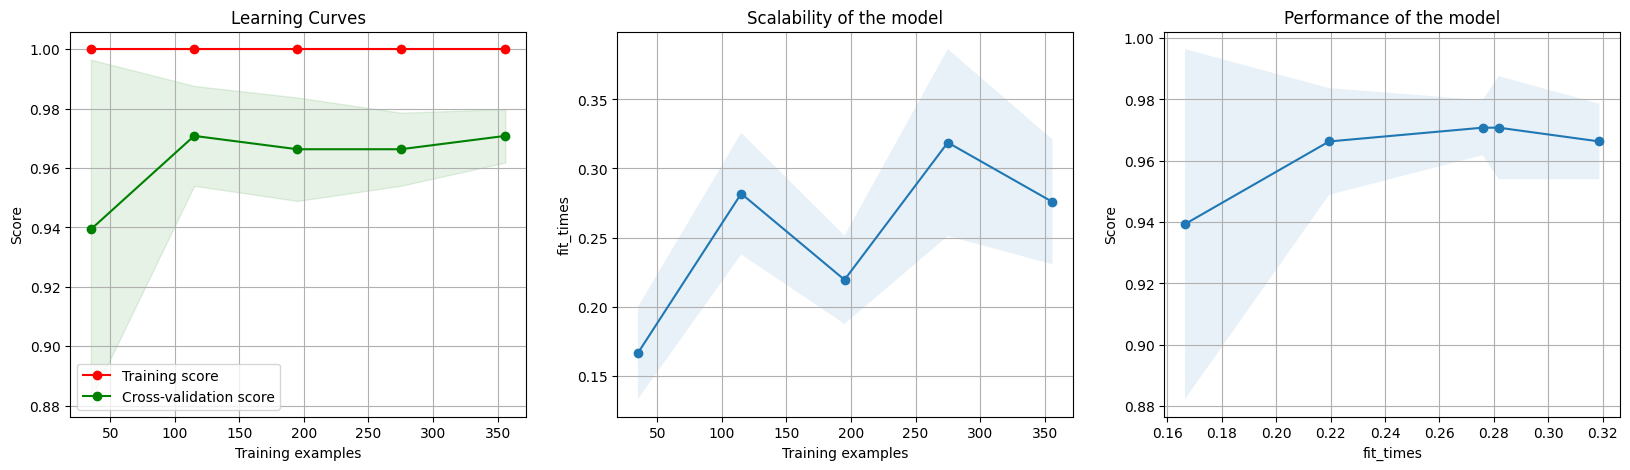

In [135]:
# plot learning curces
plot_learning_curve(best_estimator_pipeline3_round1, 'Learning Curves',
                    X_train_final, ytrain, n_jobs=-1)

In [136]:
# let's check the train scores
print(best_estimator_pipeline3_round1.score(X_train_final, y_train))

# let's check the cross validation score
print(complete_bayes_pipeline3_round1.best_score_)

1.0
0.8998232104973679


In [137]:
# Final Pipeline
def final_pipeline(text):
    cleaned_text = cpp.transform(text)
    # cleaned_text = joblib.load(file_X_test_cleaned_sparse_embed)
    X_features, feature_names = featurizer.fit_transform(text)
    X_final = pd.concat((pd.DataFrame(cleaned_text, columns=['cleaned_text']),
                         pd.DataFrame(X_features, columns=feature_names)), axis=1)
    best_estimator_pipeline3_round1 = joblib.load(
        file_best_estimator_pipeline3)
    predictions = best_estimator_pipeline3_round1.predict(X_final)
    return predictions

In [138]:
# predicted values for Test data set
y_test_pred = final_pipeline(xtest)

/content/drive/MyDrive/NLP/custom-functions/custom_preprocessor_mod.py:90: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [139]:
print('\nTest set classification report:\n\n',
      classification_report(y_test, y_test_pred))



Test set classification report:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99        98
           1       0.93      0.93      0.93        14

    accuracy                           0.98       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.98      0.98      0.98       112



In [140]:
# prompt: plot confusion matrix

print(confusion_matrix(ytest, y_test_pred))

[[97  1]
 [ 1 13]]
